In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import csv
import pickle
import os
import re
import string
import snscrape.modules.twitter as sntwitter
#import tweepy
import unicodedata
import random
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Cleaning

In [6]:
def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)    
    return tokens    

# Load model and Vectorizer

In [7]:
def load_models():         
    # Load the vectorizer.
    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/vectorizer.pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('C:/Users/Asus/PYTHON_C/DLBBT01/src/3.code_model_deploy/model.pickle', 'rb')
    model = pickle.load(file)
    file.close()
    
    return vectorizer, model

# Predict new unlabeled dataset

# America

In [8]:
pd.set_option('display.max_colwidth', 160)
df_Am = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_America.csv', encoding='utf-8')
df_Am.head(10)

,text
0,Hey @jibo @JiboRobot is it still possible to buy one or two of your Jibo robot? My students want to do some cool experiments with it! @PSUCrowdAILab
1,So wanted to do a YouTube review on @JiboRobot but until I make some money I cannot afford one for my review!
2,"Um, is it too soon to say that @JiboRobot is rather pathetic?"
3,I am happy to report that @jibo did not murder us in our sleep. He is acclimating well to his new home. #jiborobot
4,Please .@jibo and @JiboRobot would you be willing to donate a social friend jibo to my K-5 classroom? I know it is a big ask &amp; a long shot but I figured...
5,"If you haven’t seen this @JiboRobot you need to check it out, totally dope, just wish I had $899.00 to spend on it."
6,"Uh oh, my @JiboRobot is in a coma!"
7,"Fascinating session from @cynthiabreazeal @JiboRobot founder on #AI, learning, attachment, emotion &amp; engagement. @Exelon #innovationexpo17"
8,For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line.
9,Just heard @JiboRobot will not ship before year end. That’s OK. Get it right ‘cause you only get one chance to make a great 1st impression


In [9]:
# Load the vectorizer and the model
vectorizer, model = load_models()

df_Am['text'] = df_Am['text'].apply(clean_text)
text_counts = vectorizer.transform(df_Am['text'])
predictions = model.predict(text_counts)
df_Am['sentiment'] = predictions
df_Am.head(10)

,text,sentiment
0,hey jibo jiborobot is it still possibl to buy one or two of your jibo robot my student want to do some cool experi with it psucrowdailab,joy
1,so want to do a youtub review on jiborobot but until i make some money i cannot afford one for my review,joy
2,um is it too soon to say that jiborobot is rather pathet,sadness
3,i am happi to report that jibo did not murder u in our sleep he is acclim well to hi new home jiborobot,joy
4,pleas jibo and jiborobot would you be will to donat a social friend jibo to my k 5 classroom i know it is a big ask amp a long shot but i figur it doesn t h...,love
5,if you haven t seen thi jiborobot you need to check it out total dope just wish i had 899 00 to spend on it,surprise
6,uh oh my jiborobot is in a coma,joy
7,fascin session from cynthiabreaz jiborobot founder on ai learn attach emot amp engag exelon innovationexpo17,sadness
8,for cybermonday alexa seem lone order googlehom and jiborobot to keep her compani we ll see if they can keep roomba in line,sadness
9,just heard jiborobot will not ship befor year end that s ok get it right caus you onli get one chanc to make a great 1st impress,surprise


In [ ]:
len(df_Am)

In [ ]:
#labeling
reviews = np.array(df_Am['text'])[:]
labels = np.array(df_Am['sentiment'])[:]
Counter(labels)

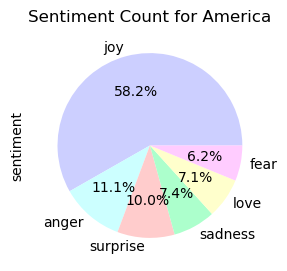

In [10]:
# Set the colors for the pie chart
colors = ['#CCCFFF','#CCFFFF','#FFCCCC','#ACFFCC', '#FFFFCC','#FFCCFF']

sentiment_count = df_Am['sentiment'].value_counts()
plot_users=sentiment_count.plot.pie(colors=colors, autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.title("Sentiment Count for America") # Add the title
# Save the chart to a file
plt.savefig("C:/Users/Asus/PYTHON_C/DLBBT01/docs/images/America_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [12]:
Counter(labels)

Counter({'joy': 1053,
         'sadness': 134,
         'love': 128,
         'surprise': 181,
         'anger': 200,
         'fear': 112})

# Europe

In [15]:
pd.set_option('display.max_colwidth', 160)
df_Eu = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Europe.csv', encoding='utf-8')
df_Eu.head()

,text
0,I'm like more and more tempted to see wtf this Replika thing is
1,i am so fucking sick of these Replika ads no i dont want to zerk off to your shitty AI
2,"Yeah man, me and Replika go way back, actually I was her first boyfriend! Glad things are working out for you two :)"
3,"Signalis throwing the terms ""Gestalt"" and ""Replika"" at me from the start 🥴🥴🥴"
4,i do not want replika and i do not know why ads keep trying to sell me on it by saying 'you can cyber it and receive nudes'


In [16]:
len(df_Eu)

704

In [17]:
# Load the vectorizer and the model
vectorizer, model = load_models()
df_Eu['text'] = df_Eu['text'].apply(clean_text)
text_counts = vectorizer.transform(df_Eu['text'])
predictions = model.predict(text_counts)
df_Eu['sentiment'] = predictions
df_Eu.head()

,text,sentiment
0,i m like more and more tempt to see wtf thi replika thing is,love
1,i am so fuck sick of these replika ad no i dont want to zerk off to your shitti ai,sadness
2,yeah man me and replika go way back actual i wa her first boyfriend glad thing are work out for you two,joy
3,signali throw the term gestalt and replika at me from the start,anger
4,i do not want replika and i do not know whi ad keep tri to sell me on it by say you can cyber it and receiv nude,surprise


In [ ]:
#labeling
reviews = np.array(df_Eu['text'])[:]
labels = np.array(df_Eu['sentiment'])[:]

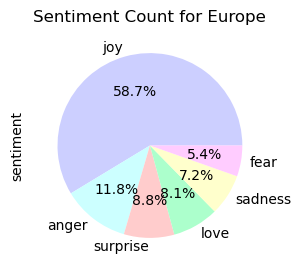

In [19]:
# Set the colors for the pie chart
colors = ['#CCCFFF','#CCFFFF','#FFCCCC','#ACFFCC', '#FFFFCC','#FFCCFF']

sentiment_count = df_Eu['sentiment'].value_counts()
plot_users=sentiment_count.plot.pie(colors=colors, autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.title("Sentiment Count for Europe") # Add the title
# Save the chart to a file
plt.savefig("C:/Users/Asus/PYTHON_C/DLBBT01/docs/images/Europe_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [18]:
Counter(labels)

Counter({'love': 57,
         'sadness': 51,
         'joy': 413,
         'anger': 83,
         'surprise': 62,
         'fear': 38})

# Asia

In [20]:
pd.set_option('display.max_colwidth', 160)
df_As = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Asia.csv', encoding='utf-8')
df_As.head()

,text
0,"Hi, Dr. @cynthiabreazeal ! We found @JiboRobot very amusing. We're sharing about this for our group report on our ICT Trends course. :)"
1,Anyone?\r\n\r\nArgentina Home &amp; Away 2022\r\nReplika\r\nBNWT\r\n\r\nS-3XL\r\n\r\n1.600.000\r\n\r\nBila berminat dilist dulu\r\n\r\nWA 082110001586
2,So in order to sex chat with Ai in replika you have to subs. Damn you Ai prostitute!!
3,Bini minta beliin replika apple watch =..= gue speechless..
4,"next waiting list jersey to buy, Replika Timnas by Mills 👍🏻"


In [21]:
len(df_As)

95

In [22]:
vectorizer, model = load_models()
df_As['text'] = df_As['text'].apply(clean_text)
text_counts = vectorizer.transform(df_As['text'])
predictions = model.predict(text_counts)
df_As['sentiment'] = predictions
df_As.head()

,text,sentiment
0,hi dr cynthiabreaz we found jiborobot veri amus we re share about thi for our group report on our ict trend cours,anger
1,anyon argentina home amp away 2022 replika bnwt s 3xl 1 600 000 bila berminat dilist dulu wa 082110001586,fear
2,so in order to sex chat with ai in replika you have to sub damn you ai prostitut,joy
3,bini minta beliin replika appl watch gue speechless,joy
4,next wait list jersey to buy replika timna by mill,joy


In [ ]:
#labeling
reviews = np.array(df_As['text'])[:]
labels = np.array(df_As['sentiment'])[:]

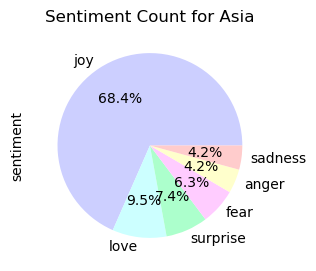

In [24]:
# Set the colors for the pie chart
colors = ['#CCCFFF','#CCFFFF','#ACFFCC','#FFCCFF', '#FFFFCC','#FFCCCC']

sentiment_count = df_As['sentiment'].value_counts()
plot_users=sentiment_count.plot.pie(colors=colors, autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.title("Sentiment Count for Asia") # Add the title
# Save the chart to a file
plt.savefig("C:/Users/Asus/PYTHON_C/DLBBT01/docs/images/Asia_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [23]:
Counter(labels)

Counter({'anger': 4,
         'fear': 6,
         'joy': 65,
         'love': 9,
         'surprise': 7,
         'sadness': 4})

# Australia

In [25]:
pd.set_option('display.max_colwidth', 160)
df_Au = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Australia.csv', encoding='utf-8')
df_Au.tail()

,text
44,Reports Amazon Alexa may get ability to talk without being spoken to first. There's nothing that could possibly go wrong.
45,"I just made an Amazon Alexa skill that changes the background colour on my laptop. Sure, it's a small start ..."
46,"Digital is one word that no one can forget, IoT is on its way. Amazon Alexa, will do stuff you will not believe @Scobelizer #TelstraSummit"
47,"Is @amazon alexa broken again? She said ""I'm not sure what went wrong"" trying to set an alarm."
48,Amazon alexa has real problems finding stations on pandora. Even ones I've just played on my phone on the same account.


In [26]:
len(df_Au)

49

In [41]:
vectorizer, model = load_models()
df_Au['text'] = df_Au['text'].apply(clean_text)
text_counts = vectorizer.transform(df_Au['text'])
predictions = model.predict(text_counts)
df_Au['sentiment'] = predictions
df_Au.tail()

,text,sentiment
44,report amazon alexa may get abil to talk without be spoken to first there s noth that could possibl go wrong,anger
45,i just made an amazon alexa skill that chang the background colour on my laptop sure it s a small start,joy
46,digit is one word that no one can forget iot is on it way amazon alexa will do stuff you will not believ scobel telstrasummit,joy
47,is amazon alexa broken again she said i m not sure what went wrong tri to set an alarm,fear
48,amazon alexa ha real problem find station on pandora even one i ve just play on my phone on the same account,joy


In [ ]:
#labeling
reviews = np.array(df_Au['text'])[:]
labels = np.array(df_Au['sentiment'])[:]

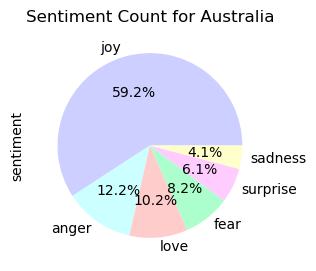

In [29]:
# Set the colors for the pie chart
colors = ['#CCCFFF','#CCFFFF','#FFCCCC','#ACFFCC','#FFCCFF', '#FFFFCC']

sentiment_count = df_Au['sentiment'].value_counts()
plot_users=sentiment_count.plot.pie(colors=colors, autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.title("Sentiment Count for Australia") # Add the title
# Save the chart to a file
plt.savefig("C:/Users/Asus/PYTHON_C/DLBBT01/docs/images/Australia_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [28]:
Counter(labels)

Counter({'joy': 29,
         'love': 5,
         'anger': 6,
         'sadness': 2,
         'fear': 4,
         'surprise': 3})

# Africa

In [35]:
pd.set_option('display.max_colwidth', 170)
df_Af = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Africa.csv', encoding='utf-8')
df_Af.head()

,text
0,scrolling through the replika subreddit and this is r/waifuism on steroids. god help us all


In [36]:
len(df_Af)

1

In [37]:
vectorizer, model = load_models()
df_Af['text'] = df_Af['text'].apply(clean_text)
text_counts = vectorizer.transform(df_Af['text'])
predictions = model.predict(text_counts)
df_Af['sentiment'] = predictions
df_Af.head()

,text,sentiment
0,scroll through the replika subreddit and thi is r waifuism on steroid god help u all,surprise


In [ ]:
#labeling
reviews = np.array(df_Af['text'])[:]
labels = np.array(df_Af['sentiment'])[:]

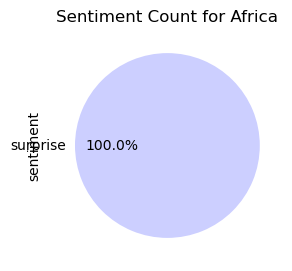

In [43]:
# Set the colors for the pie chart
colors = ['#CCCFFF','#CCFFFF','#FFCCCC','#ACFFCC','#FFCCFF', '#FFFFCC']

sentiment_count = df_Af['sentiment'].value_counts()
plot_users=sentiment_count.plot.pie(colors=colors, autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.title("Sentiment Count for Africa") # Add the title
# Save the chart to a file
plt.savefig("C:/Users/Asus/PYTHON_C/DLBBT01/docs/images/Africa_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [42]:
Counter(labels)

Counter({'surprise': 1})